In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing import image


In [2]:
# Paths
test_dir = "../Datasets/Bone_Fracture_Detection/test"

# Load the trained model
model = load_model('fracture_detection_mobilenetv2.h5')

print("✅ Model loaded successfully!")


✅ Model loaded successfully!


In [7]:

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True  # ✅ Prevent crash on truncated images

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)



Found 506 images belonging to 2 classes.


In [8]:
# Evaluate model on test data
test_loss, test_acc = model.evaluate(test_generator)
print(f"\n📊 Test Accuracy: {test_acc:.4f}")
print(f"📉 Test Loss: {test_loss:.4f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 581ms/step - accuracy: 0.9486 - loss: 0.1613

📊 Test Accuracy: 0.9486
📉 Test Loss: 0.1613


16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 717ms/step

🧾 Classification Report:

               precision    recall  f1-score   support

    fractured       0.92      0.97      0.95       238
not fractured       0.97      0.93      0.95       268

     accuracy                           0.95       506
    macro avg       0.95      0.95      0.95       506
 weighted avg       0.95      0.95      0.95       506



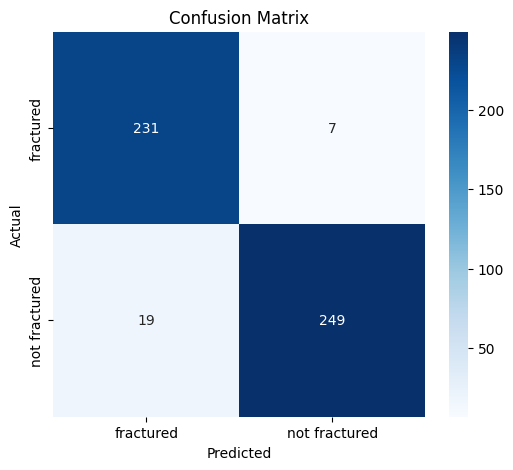

In [9]:
# Predict labels
Y_pred = model.predict(test_generator)
y_pred = np.where(Y_pred > 0.5, 1, 0)

# Get true labels
y_true = test_generator.classes

# Classification report
print("\n🧾 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=list(test_generator.class_indices.keys())))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


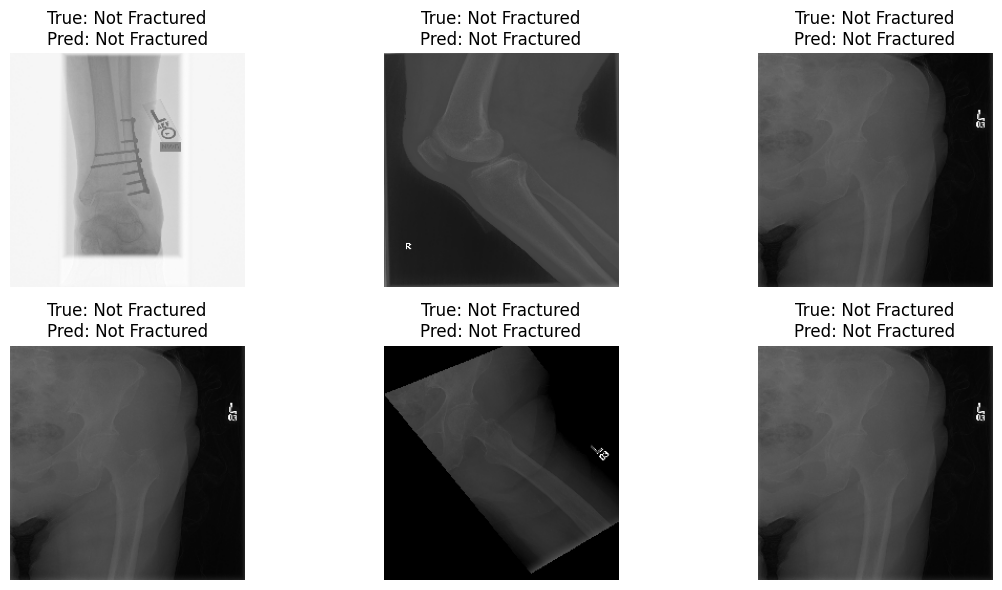

In [10]:
# Visualize a few predictions
def visualize_predictions(generator, model, num_images=6):
    x_batch, y_batch = next(generator)
    preds = model.predict(x_batch)
    pred_labels = np.where(preds > 0.5, 1, 0)
    
    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        plt.subplot(2, 3, i+1)
        plt.imshow(x_batch[i])
        true_label = 'Fractured' if y_batch[i] == 1 else 'Not Fractured'
        predicted_label = 'Fractured' if pred_labels[i] == 1 else 'Not Fractured'
        plt.title(f"True: {true_label}\nPred: {predicted_label}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

visualize_predictions(test_generator, model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


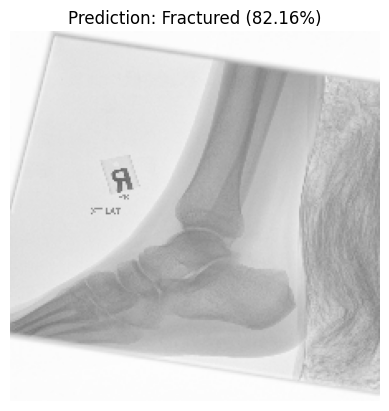

In [15]:
def predict_fracture(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0][0]
    label = "Fractured" if prediction > 0.5 else "Not Fractured"
    confidence = prediction if prediction > 0.5 else 1 - prediction

    plt.imshow(img)
    plt.title(f"Prediction: {label} ({confidence*100:.2f}%)")
    plt.axis("off")
    plt.show()

# 🔍 Example usage
predict_fracture("../Datasets/Bone_Fracture_Detection/test/not fractured/11.png")


16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 631ms/step

📊 Classification Report:
               precision    recall  f1-score   support

    Fractured       0.92      0.97      0.95       238
Not Fractured       0.97      0.93      0.95       268

     accuracy                           0.95       506
    macro avg       0.95      0.95      0.95       506
 weighted avg       0.95      0.95      0.95       506



C:\Users\lenovo\anaconda3\envs\boneai\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


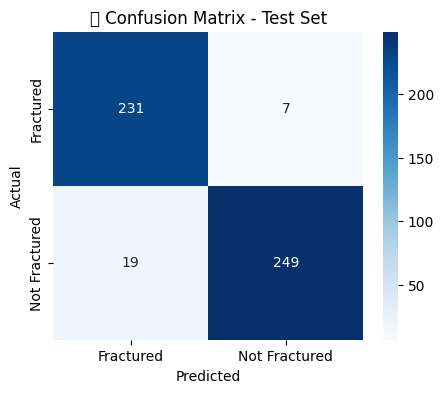

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions on the entire test dataset
y_pred = model.predict(test_generator)
y_pred_classes = (y_pred > 0.5).astype(int).ravel()
y_true = test_generator.classes

# Classification report
print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=['Fractured', 'Not Fractured']))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fractured', 'Not Fractured'],
            yticklabels=['Fractured', 'Not Fractured'])
plt.title("🧩 Confusion Matrix - Test Set")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


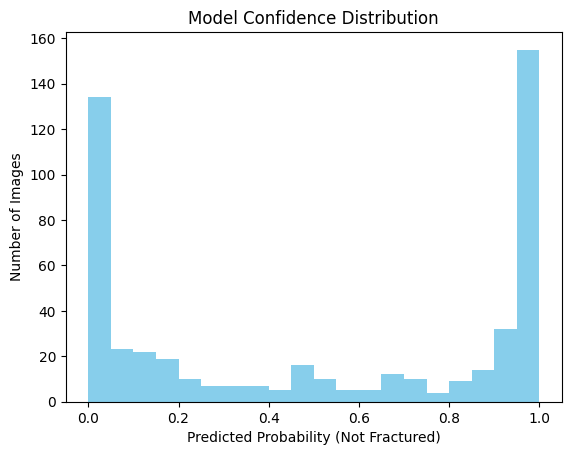

In [14]:
plt.hist(y_pred, bins=20, color='skyblue')
plt.title("Model Confidence Distribution")
plt.xlabel("Predicted Probability (Not Fractured)")
plt.ylabel("Number of Images")
plt.show()


In [16]:
# show mapping between folder names and binary labels
print("Class indices:", test_generator.class_indices)


Class indices: {'fractured': 0, 'not fractured': 1}


In [17]:

from sklearn.metrics import classification_report, confusion_matrix

# Full predictions
y_prob = model.predict(test_generator)
y_pred = (y_prob > 0.5).astype(int).ravel()
y_true = test_generator.classes

print(classification_report(y_true, y_pred, target_names=list(test_generator.class_indices.keys())))
cm = confusion_matrix(y_true, y_pred)
print("Confusion matrix:\n", cm)


16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 599ms/step
               precision    recall  f1-score   support

    fractured       0.92      0.97      0.95       238
not fractured       0.97      0.93      0.95       268

     accuracy                           0.95       506
    macro avg       0.95      0.95      0.95       506
 weighted avg       0.95      0.95      0.95       506

Confusion matrix:
 [[231   7]
 [ 19 249]]


In [18]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = '../Datasets/Bone_Fracture_Detection/test/not fractured/11.png'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0  # Normalize just like training
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)[0][0]
label = 'fractured' if prediction < 0.5 else 'not fractured'
confidence = prediction if label == 'not fractured' else 1 - prediction

print(f"Predicted: {label} ({confidence*100:.2f}%)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted: not fractured (82.16%)
